In [162]:
import requests
import bs4
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [163]:
page = requests.get('https://kenpom.com/')
soup = bs4.BeautifulSoup(page.content, 'html.parser')
tables = soup.find('table', id='ratings-table')
rows = tables.find_all('tr', class_=lambda x: x != 'thead1' and x != 'thead2')
header = tables.find('tr', class_= 'thead2')
columns = []
for th in header.find_all('th'):
    columns.append(th.text)
    
l = []
for tr in rows:
    td = tr.find_all('td', class_ = lambda x: x != 'td-right')
    row = [tr.text for tr in td]
    l.append(row)
kp_data = pd.DataFrame(l, columns=columns)

In [164]:
kp_data.columns = ['Rk', 'Team', 'Conf', 'W-L', 'AdjEM', 'AdjO', 'AdjD', 'AdjT', 'Luck', 'OppAdjEM', 'OppO', 'OppD', 'NcOppAdjEM']

In [165]:
kp_data.head()

,Rk,Team,Conf,W-L,AdjEM,AdjO,AdjD,AdjT,Luck,OppAdjEM,OppO,OppD,NcOppAdjEM
0,1,Baylor,B12,0-0,+26.67,112.4,85.7,70.2,+.000,+0.00,0.0,0.0,+0.00
1,2,Gonzaga,WCC,0-0,+26.56,113.4,86.8,74.3,+.000,+0.00,0.0,0.0,+0.00
2,3,Duke,ACC,0-0,+26.35,111.7,85.3,74.3,+.000,+0.00,0.0,0.0,+0.00
3,4,Villanova,BE,0-0,+25.24,111.5,86.2,70.2,+.000,+0.00,0.0,0.0,+0.00
4,5,Kansas,B12,0-0,+24.17,108.9,84.7,71.9,+.000,+0.00,0.0,0.0,+0.00


In [166]:
kp_data['AdjEM'] = kp_data['AdjEM'].str.replace('+', '')
kp_data['Luck'] = kp_data['Luck'].str.replace('+', '')
kp_data['OppAdjEM'] = kp_data['OppAdjEM'].str.replace('+', '')
kp_data['NcOppAdjEM'] = kp_data['NcOppAdjEM'].str.replace('+', '')

num_cols = [column for column in kp_data.columns if column not in ['Team', 'Conf', 'W-L']]
kp_data[num_cols] = kp_data[num_cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [169]:
conf_list = list(kp_data['Conf'].unique())
COLORS = {key: None for key in conf_list}
COLORS['B12'] = '#ef483e'
COLORS['WCC'] = '#33cad1'
COLORS['ACC'] = '#013ca6'
COLORS['BE'] = '#e41c39'
COLORS['B10'] = '#0088ce'
COLORS['SEC'] = '#ffd046'
COLORS['P12'] = '#004b91'
COLORS['Amer'] = '#e2231a'
COLORS['MWC'] = '#4f2d7f'
COLORS['A10'] = '#232220'
COLORS['MVC'] = '#e51636'
COLORS['SC'] = '#da291c'
COLORS['CUSA'] = '#bbbcbc'
COLORS['AE'] = '#1d2247'
COLORS['OVC'] = '#A51341'
COLORS['Sum'] = '#939598'
COLORS['Ivy'] = '#01563f'
COLORS['WAC'] = '#d9d4cc'
COLORS['SB'] = '#f2a900'
COLORS['Horz'] = '#f5a01a'
COLORS['BSth'] = '#F47B20'
COLORS['MAC'] = '#00a160'
COLORS['BW'] = '#2b265b'
COLORS['MAAC'] = '#004fa3'
COLORS['BSky'] = '#70cde3'
COLORS['Pat'] = '#FFFFFF'
COLORS['Slnd'] = '#FEB825'
COLORS['CAA'] = '#D4B07E'
COLORS['ASun'] = '#f3e500'
COLORS['NEC'] = '#006BA3'
COLORS['MEAC'] = '#34006D'
COLORS['SWAC'] = '#030303'

def PlotTeams(stat, n, conf=None):
    plt.rcParams["figure.figsize"] = (20,10)
    if conf == None:
        if stat == 'AdjD' or stat == 'OppD':
            data = kp_data.sort_values(by=stat).head(n)
        else: data = kp_data.sort_values(by=stat, ascending=False).head(n)
    else: 
        if stat == 'AdjD' or stat == 'OppD':
            data = kp_data.loc[kp_data['Conf'].isin(conf)].sort_values(by=stat).head(n)
        else: data = kp_data.loc[kp_data['Conf'].isin(conf)].sort_values(by=stat, ascending=False).head(n)
    sns.barplot(x='Team', y=stat, hue='Conf', palette=COLORS, data=data, dodge=False)
    plt.xticks(rotation=90)
    plt.ylim(min(data[stat]) * .95, max(data[stat]) * 1.05)
    plt.title('{}')
    plt.show()

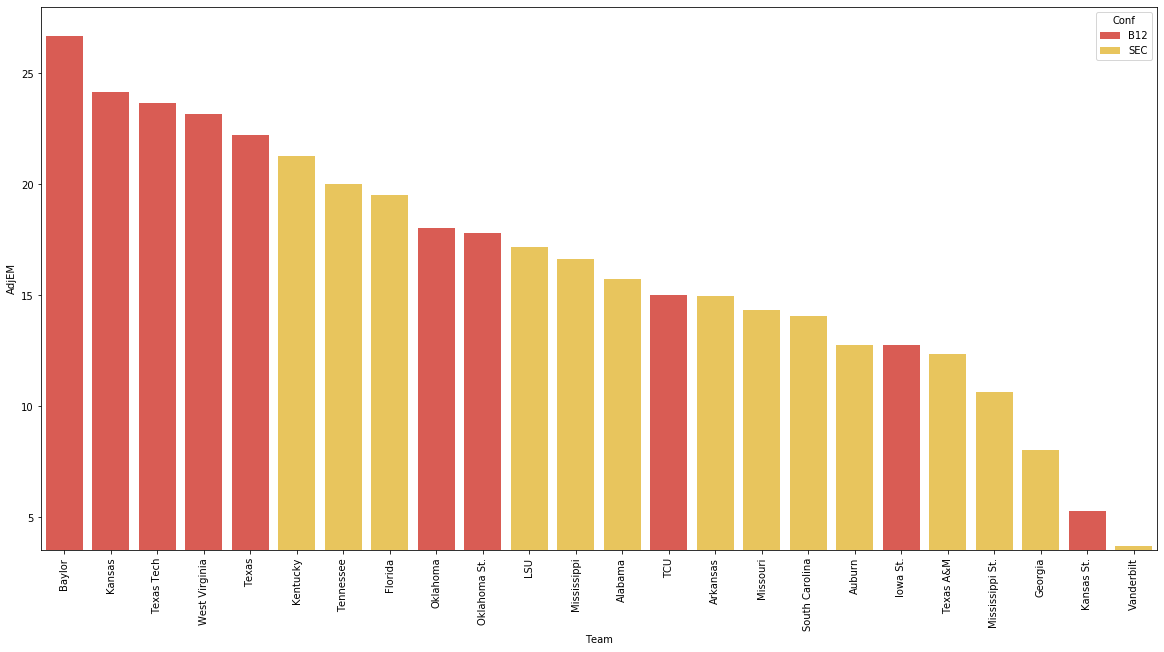

In [171]:
PlotTeams(stat='AdjEM', n=25, conf=['B12', 'SEC'])

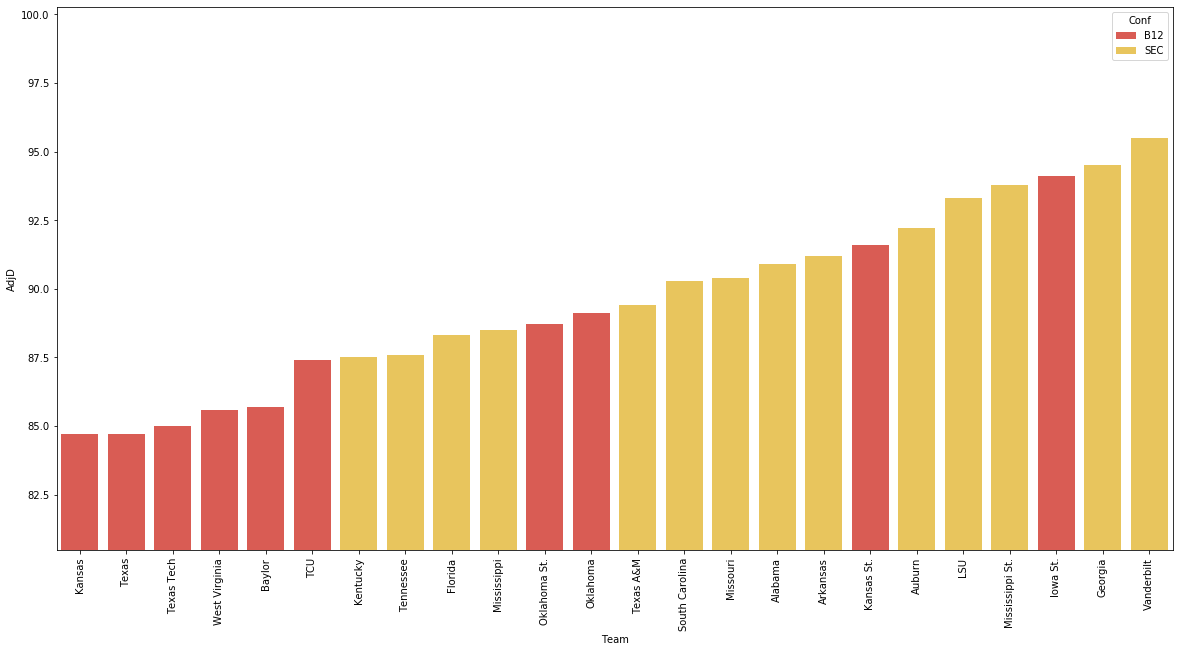

In [172]:
PlotTeams(stat='AdjD', n=25, conf=['B12', 'SEC'])